# Set operations

The three functions, [](`~genominterv.intervals.interval_diff`), [](`~genominterv.intervals.interval_intersect`), and [](`~genominterv.intervals.interval_union`), do the standard difference, intersection and union set operations on two sets of genomic intervals. The intervals returned from all three functions are collapsed to produce non-overlapping intervals. The genomic intervals in each set must be non-overlapping. This can be achieved using the [](`~genominterv.intervals.interval_collapse`) function, which produces the union of genomic intervals in a single set genomic of intervals.

In [1]:
#| echo: false
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

## Collapse overlapping intervals in a list

In [2]:
intervals = [('chr1', 1, 3), ('chr1', 4, 6), ('chr1', 5, 10), ('chr1', 25, 30), 
             ('chr1', 20, 27), ('chr2', 1, 10), ('chr2', 1, 3)]
annot = pd.DataFrame.from_records(intervals, columns=['chrom', 'start', 'end'])
annot

,chrom,start,end
0,chr1,1,3
1,chr1,4,6
2,chr1,5,10
3,chr1,25,30
4,chr1,20,27
5,chr2,1,10
6,chr2,1,3


In [3]:
from genominterv import interval_collapse

annot_collapsed = interval_collapse(annot)
annot_collapsed

,start,end,chrom
0,1,3,chr1
1,4,10,chr1
2,20,30,chr1
3,1,10,chr2


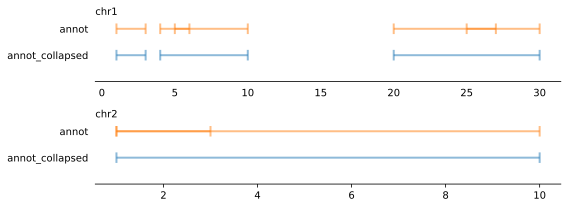

In [4]:
#| echo: false
#| label: fig-collapse
#| fig-cap: "Collapsed intervals"
from genominterv.intervals import _plot_intervals
_plot_intervals(annot=annot, annot_collapsed=annot_collapsed)

## Non-overlap

In [5]:
annot = annot_collapsed

intervals = [('chr1', 8, 22), ('chr2', 14, 15)]
query = pd.DataFrame.from_records(intervals, columns=['chrom', 'start', 'end'])
query

,chrom,start,end
0,chr1,8,22
1,chr2,14,15


In [6]:
from genominterv.intervals import interval_diff

non_ovl_query = interval_diff(query, annot)
non_ovl_query

,start,end,chrom
0,10,20,chr1
1,14,15,chr2


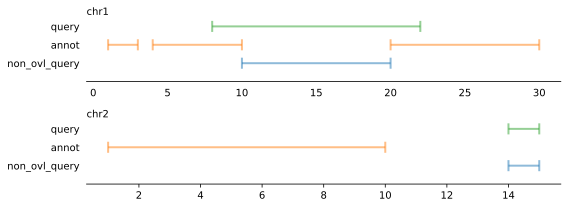

In [7]:
#| echo: false
#| label: fig-nonoverlap
#| fig-cap: "Non-overlapping intervals"
from genominterv.intervals import _plot_intervals
_plot_intervals(query=query, annot=annot, non_ovl_query=non_ovl_query)

## Intersection

In [8]:
from genominterv import interval_intersect

intersection = interval_intersect(query, annot)
intersection

,start,end,chrom
0,8,10,chr1
1,20,22,chr1


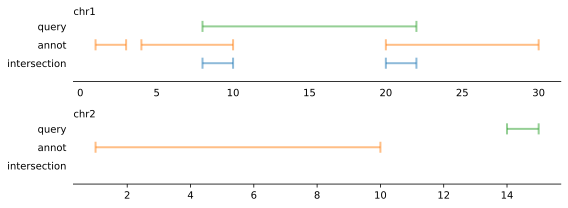

In [9]:
#| echo: false
#| label: fig-intersect
#| fig-cap: "Intersection of intervals"
from genominterv.intervals import _plot_intervals
_plot_intervals(query=query, annot=annot, intersection=intersection)

## Union

In [10]:
from genominterv import interval_union

union = interval_union(query, annot)
union

,start,end,chrom
0,1,3,chr1
1,4,30,chr1
2,1,10,chr2
3,14,15,chr2


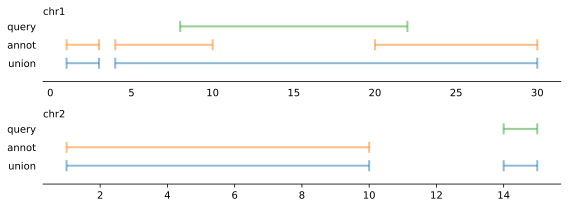

In [11]:
#| echo: false
#| label: fig-union
#| fig-cap: "Union of intervals"
from genominterv.intervals import _plot_intervals
_plot_intervals(query=query, annot=annot, union=union)